## Vou tentar prever a inflação acumulada do ano de 2024 no Brasil

## O modelo final ajustado, retornou o valor de 3.9%. É um modelo otimista!
## A inflação com certeza vai ficar entre 3.9% e 4.5%



---



In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go

In [185]:
import gspread

In [186]:
url = "https://docs.google.com/spreadsheets/d/1lKoL4yJhY6IkqCL2qkzKQ5dE8py-GTN9/export?format=csv"
dados = pd.read_csv(url)

In [187]:
#colocar a coluna Date como datetime
dados['Date'] = pd.to_datetime(dados['Date'])
#vou apagar o localizado na linha 0
dados.drop(dados.index[0], inplace=True)

In [188]:
dados.head()

,Date,acumul.,variaç.
1,1994-03-01,3417.39,42.75
2,1994-04-01,3828.49,42.68
3,1994-05-01,4331.19,44.03
4,1994-06-01,4922.60,47.43
5,1994-07-01,4005.08,6.84


In [189]:
# Filtrar os dados a partir de janeiro de 2000
df = dados[dados['Date'] >= '2000-01-01']
df.head()

,Date,acumul.,variaç.
71,2000-01-01,8.85,0.62
72,2000-02-01,7.86,0.13
73,2000-03-01,6.92,0.22
74,2000-04-01,6.77,0.42
75,2000-05-01,6.47,0.01


In [190]:
#vou renomear o dataframe para Date, inflacao, variacao
df.rename(columns={'Date': 'date', 'acumul.': 'inflacao', 'variaç.': 'variacao'}, inplace=True)

<ipython-input-190-01af6af97284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 'date', 'acumul.': 'inflacao', 'variaç.': 'variacao'}, inplace=True)


In [191]:
df.head()

,date,inflacao,variacao
71,2000-01-01,8.85,0.62
72,2000-02-01,7.86,0.13
73,2000-03-01,6.92,0.22
74,2000-04-01,6.77,0.42
75,2000-05-01,6.47,0.01


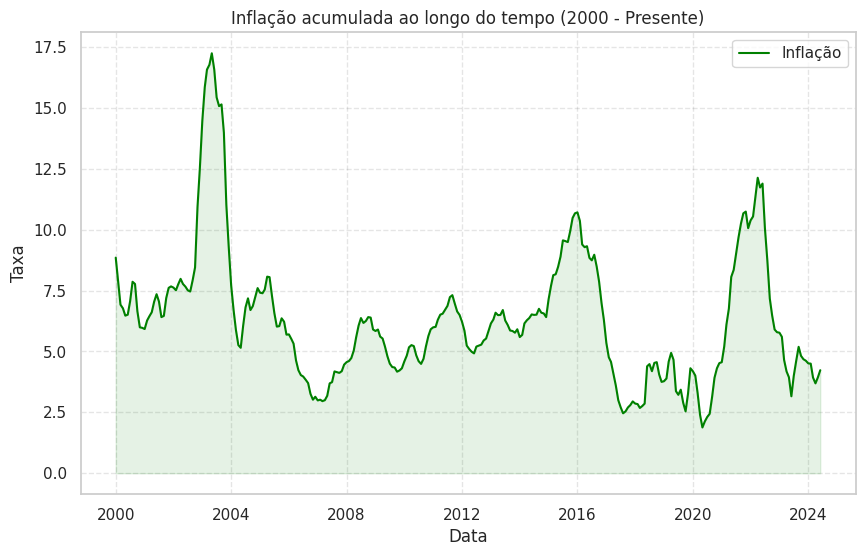

In [192]:
# Visualizar os dados com Seaborn
plt.figure(figsize=(10, 6))
#criar um fundo dark
sns.set(style="whitegrid", palette="pastel")
sns.lineplot(data=df, x='date', y='inflacao', color = 'green', label = 'Inflação')
#vou preencher o gráfico
plt.fill_between(df['date'], df['inflacao'], color='green', alpha=0.1)

plt.title('Inflação acumulada ao longo do tempo (2000 - Presente)')
plt.xlabel('Data')
plt.ylabel('Taxa')

plt.legend()

plt.grid(True, alpha = 0.1, color = 'black', linestyle = '--')
plt.show()

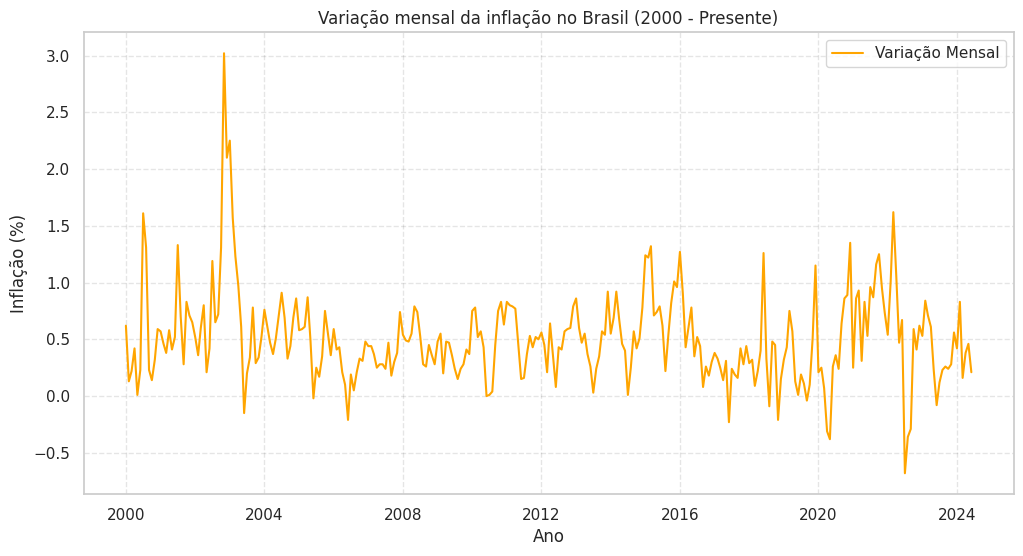

In [193]:
# Visualizar a série temporal da inflação a partir de 2000
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['variacao'], label='Variação Mensal', color = 'orange')
plt.xlabel('Ano')
plt.ylabel('Inflação (%)')
plt.title('Variação mensal da inflação no Brasil (2000 - Presente)')
plt.grid(True, alpha = 0.1, color = 'black', linestyle = '--')
plt.legend()
plt.show()

In [194]:
# Criar variáveis de lag
for lag in range(1, 13):  # Lag de 1 a 12 meses
    df[f'lag_{lag}'] = df['variacao'].shift(lag)

# Remover as linhas com valores nulos gerados pelos lags
df = df.dropna()

# Verificar as primeiras linhas do DataFrame processado
print(df.head())

         date  inflacao  variacao  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  \
83 2001-01-01      5.92      0.57   0.59   0.32   0.14   0.23   1.31   1.61   
84 2001-02-01      6.27      0.46   0.57   0.59   0.32   0.14   0.23   1.31   
85 2001-03-01      6.44      0.38   0.46   0.57   0.59   0.32   0.14   0.23   
86 2001-04-01      6.61      0.58   0.38   0.46   0.57   0.59   0.32   0.14   
87 2001-05-01      7.04      0.41   0.58   0.38   0.46   0.57   0.59   0.32   

    lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  
83   0.23   0.01   0.42    0.22    0.13    0.62  
84   1.61   0.23   0.01    0.42    0.22    0.13  
85   1.31   1.61   0.23    0.01    0.42    0.22  
86   0.23   1.31   1.61    0.23    0.01    0.42  
87   0.14   0.23   1.31    1.61    0.23    0.01  


<ipython-input-194-d424c3b71bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df['variacao'].shift(lag)
<ipython-input-194-d424c3b71bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df['variacao'].shift(lag)
<ipython-input-194-d424c3b71bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [195]:
# Definir as variáveis independentes (X) e dependentes (y)
X = df.drop(columns=['date', 'variacao', 'inflacao'])
y = df['variacao']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [196]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar um modelo ARIMA
model = ARIMA(y_train, order=(5, 1, 0))  # Exemplo com ordem (p=5, d=1, q=0)
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               variacao   No. Observations:                  225
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -39.355
Date:                Fri, 26 Jul 2024   AIC                             90.710
Time:                        14:26:47   BIC                            111.180
Sample:                             0   HQIC                            98.972
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1880      0.058     -3.269      0.001      -0.301      -0.075
ar.L2         -0.2248      0.066     -3.418      0.001      -0.354      -0.096
ar.L3         -0.0820      0.050     -1.653      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [197]:
# Previsão no conjunto de teste
y_pred = model_fit.forecast(steps=len(y_test))

# Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 0.6235489904579034


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [198]:
# Prever a inflação para os próximos meses
future_steps = 10  # Número de meses futuros para prever
future_forecast = model_fit.forecast(steps=future_steps)
print(future_forecast)

225    0.060060
226    0.101954
227    0.054765
228    0.057465
229    0.088663
230    0.070569
231    0.059729
232    0.070764
233    0.072432
234    0.065447
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


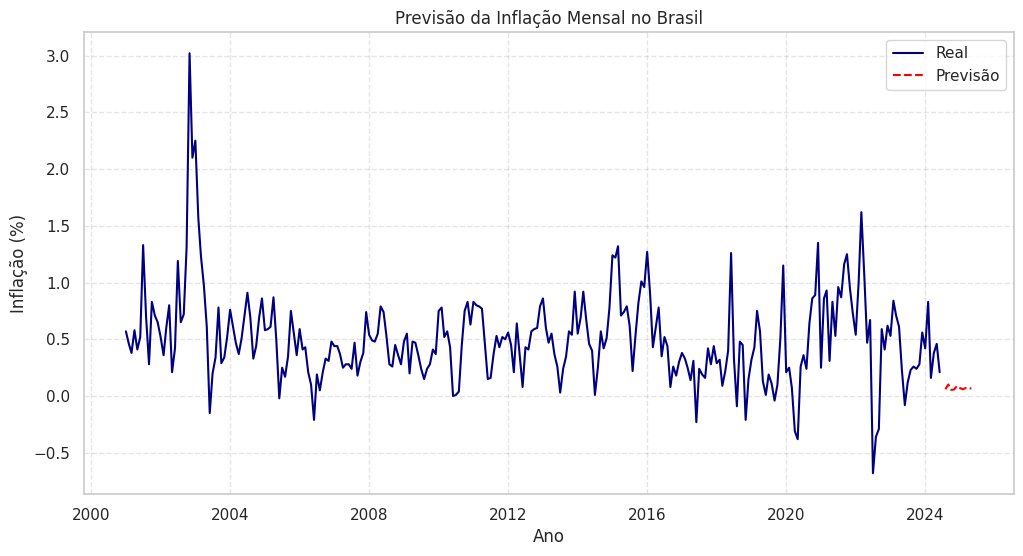

In [199]:
# Data para as previsões futuras
future_dates = pd.date_range(start=df['date'].max() + pd.DateOffset(months=1), periods=future_steps, freq='M')

# Criar um DataFrame para as previsões futuras
future_df = pd.DataFrame({
    'date': future_dates,
    'variacao': future_forecast
})

# Visualizar os dados reais e as previsões
plt.figure(figsize=(12, 6))

# Dados reais
plt.plot(df['date'], df['variacao'], label='Real', color='navy')

# Previsões futuras
plt.plot(future_df['date'], future_df['variacao'], label='Previsão', color='red', linestyle='--')

plt.xlabel('Ano')
plt.ylabel('Inflação (%)')
plt.title('Previsão da Inflação Mensal no Brasil')
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle = '--')

plt.show()

In [200]:
# Filtrar os dados reais a partir de janeiro de 2024 até junho de 2024
df_real = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-06-01')]

# Calcular a inflação acumulada real de janeiro a junho de 2024
inflacao_real_acumulada = df_real['variacao'].sum()

In [201]:
print('Inflação já acumulada no ano, até Junho:', inflacao_real_acumulada)

Inflação já acumulada no ano, até Junho: 2.46


In [202]:
df_real

,date,inflacao,variacao,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
359,2024-01-01,4.51,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08,0.23,0.61,0.71,0.84,0.53
360,2024-02-01,4.50,0.83,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08,0.23,0.61,0.71,0.84
361,2024-03-01,3.93,0.16,0.83,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08,0.23,0.61,0.71
362,2024-04-01,3.69,0.38,0.16,0.83,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08,0.23,0.61
363,2024-05-01,3.93,0.46,0.38,0.16,0.83,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08,0.23
364,2024-06-01,4.23,0.21,0.46,0.38,0.16,0.83,0.42,0.56,0.28,0.24,0.26,0.23,0.12,-0.08


In [203]:
# Verificar o número de previsões necessárias
future_steps = 12 - len(df_real)  # De julho a dezembro

# Data para as previsões futuras
future_dates = pd.date_range(start='2024-07-01', periods=future_steps, freq='M')
print(future_steps)
print(future_dates)

6
DatetimeIndex(['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M')


In [204]:
# Data para as previsões futuras
future_dates = pd.date_range(start='2024-07-01', periods=future_steps, freq='M')

# Criar um DataFrame para as previsões futuras
future_df = pd.DataFrame({
    'date': future_dates,
    'variacao': future_forecast[:future_steps]
})

# Calcular a inflação acumulada prevista de julho a dezembro de 2024
inflacao_prevista_acumulada = future_df['variacao'].sum()

# Calcular a inflação acumulada total
inflacao_acumulada_total = inflacao_real_acumulada + inflacao_prevista_acumulada

# Exibir a inflação acumulada total
print(f'Inflação acumulada de janeiro de 2024 a dezembro de 2024: {inflacao_acumulada_total:.2f}%')


Inflação acumulada de janeiro de 2024 a dezembro de 2024: 2.89%


In [205]:
# Ordenar por data
df = df.sort_values(by='date')

# Criar variáveis para a média dos últimos 5 meses
df['media_5_meses'] = df['variacao'].rolling(window=3).mean()

# Criar variáveis para a diferença em relação ao mês anterior
df['diferenca_mensal'] = df['variacao'].diff()

# Adicionar variáveis sazonais (mês do ano)
df['mes'] = df['date'].dt.month

# Remover valores nulos (resultantes das operações de rolling e diff)
df = df.dropna()

In [207]:
df.head()

,date,inflacao,variacao,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,media_5_meses,diferenca_mensal,mes
85,2001-03-01,6.44,0.38,0.46,0.57,0.59,0.32,0.14,0.23,1.31,1.61,0.23,0.01,0.42,0.22,0.470000,-0.08,3
86,2001-04-01,6.61,0.58,0.38,0.46,0.57,0.59,0.32,0.14,0.23,1.31,1.61,0.23,0.01,0.42,0.473333,0.20,4
87,2001-05-01,7.04,0.41,0.58,0.38,0.46,0.57,0.59,0.32,0.14,0.23,1.31,1.61,0.23,0.01,0.456667,-0.17,5
88,2001-06-01,7.35,0.52,0.41,0.58,0.38,0.46,0.57,0.59,0.32,0.14,0.23,1.31,1.61,0.23,0.503333,0.11,6
89,2001-07-01,7.05,1.33,0.52,0.41,0.58,0.38,0.46,0.57,0.59,0.32,0.14,0.23,1.31,1.61,0.753333,0.81,7


## vou colocar alguns dados a mais aí na modelagem para prever a inflação:
média dos 3 últimos meses e sazonalidade.

In [209]:
# Definir variáveis independentes (X) e dependentes (y)
X = df[['media_5_meses', 'diferenca_mensal', 'mes']]
y = df['variacao']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

In [210]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Exibir coeficientes do modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

MSE: 0.02
Coeficientes: [1.03977117 0.6140458  0.00409132]
Intercepto: -0.047697535863851614


In [211]:
import matplotlib.dates as mdates

In [212]:
# Adicionar previsões ao DataFrame de teste
X_test['previsao'] = y_pred

In [213]:
y_pred

array([ 0.44662226,  1.00438667,  0.02731476,  0.54305746,  0.03774108,
       -0.26120376, -0.28511019,  0.22080581,  0.12552796,  0.20941525,
        0.66451472,  0.73137299,  0.84407936,  1.35828955,  0.14395347,
        1.18766539,  0.71460402,  0.31579916,  1.00950497,  0.37144258,
        1.04907108,  0.7477222 ,  1.20350287,  1.18529624,  0.97763693,
        0.88181804,  0.60915574,  1.03931271,  1.43783588,  0.90372062,
        0.70223176,  0.86215838, -0.68858856,  0.05328922, -0.42885769,
        0.51278052,  0.13285789,  0.69182432,  0.44181067,  0.84055417,
        0.60565847,  0.65589839,  0.27663675,  0.04990487,  0.19733025,
        0.14615745,  0.21896584,  0.23394571,  0.29220929,  0.54764872,
        0.30713126,  0.83957248,  0.04185818,  0.57858664,  0.36847311,
        0.18725883])

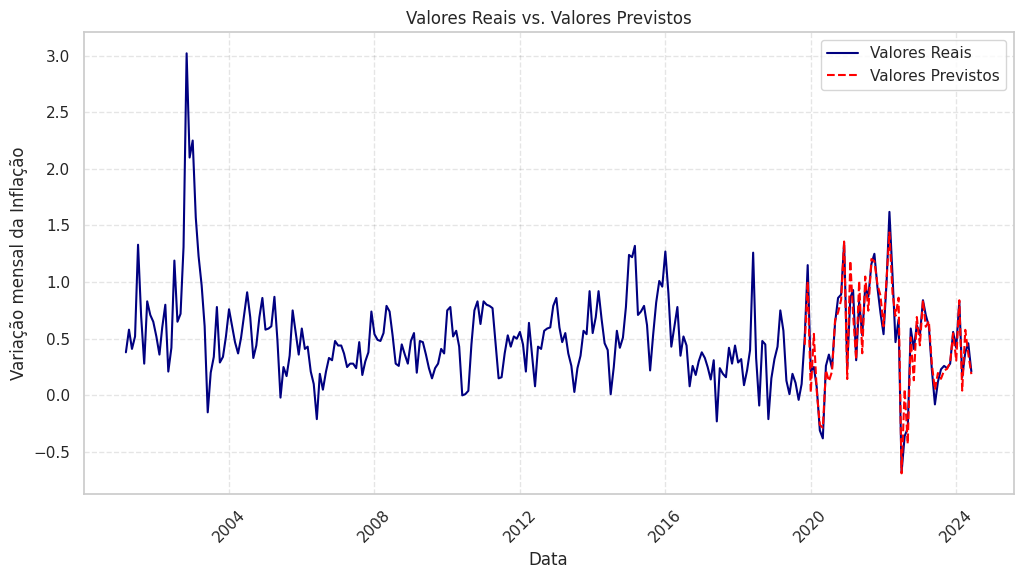

In [214]:
# Criar uma figura e eixos
plt.figure(figsize=(12, 6))

# Gráfico 1: Valores Reais vs. Valores Previstos
plt.plot(df['date'], df['variacao'], label='Valores Reais', color='navy', linewidth=1.5)
plt.plot(df['date'].iloc[-len(y_pred):], y_pred, label='Valores Previstos', color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Data')
plt.ylabel('Variação mensal da Inflação')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle = '--')
plt.xticks(rotation=45)
plt.show()

In [215]:
#vou filtrar os próximos 6 dados de y_pred (ou seja, os últimos 6 valores da lista)
y_pred_2024 = y_pred[-6:]

In [216]:
y_pred_2024

array([0.30713126, 0.83957248, 0.04185818, 0.57858664, 0.36847311,
       0.18725883])

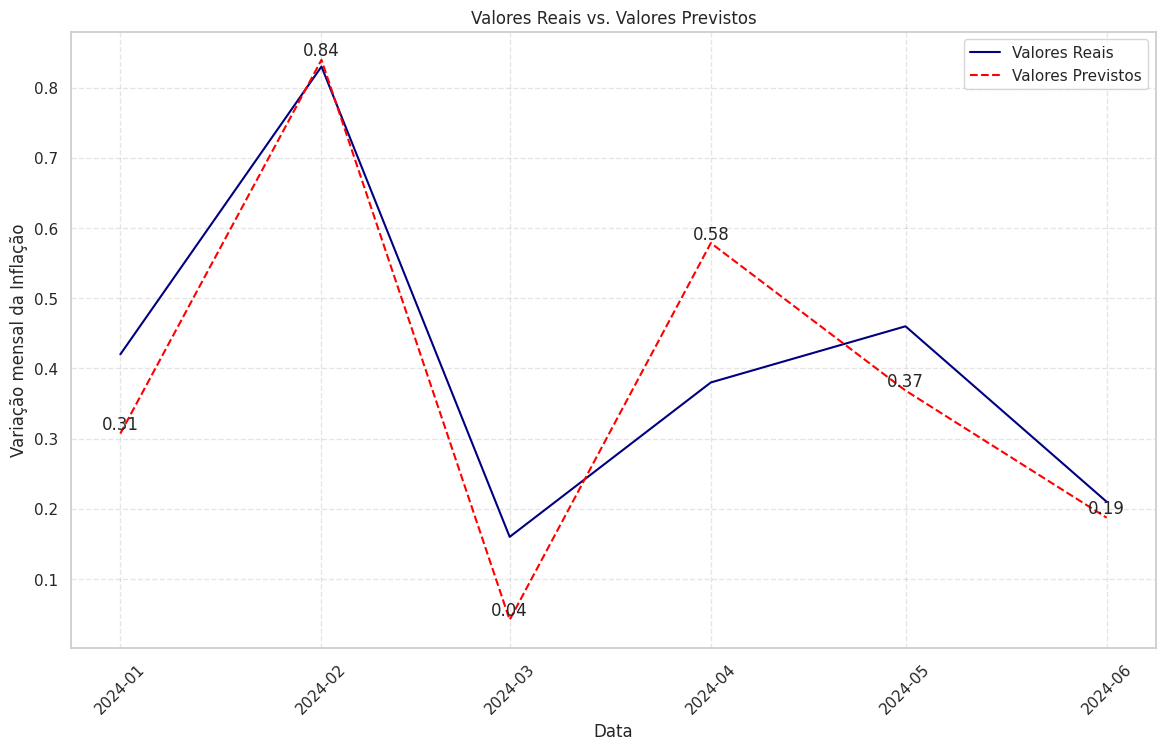

In [217]:
#vou visualizar os dados df_2024 variacao com os valores estimados
# Criar uma figura e eixos
plt.figure(figsize=(14, 8))

# Gráfico 1: Valores Reais vs. Valores Previstos
plt.plot(df_2024['date'], df_2024['variacao'], label='Valores Reais', color='navy', linewidth=1.5)
plt.plot(df_2024['date'], y_pred_2024, label='Valores Previstos', color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Data')
plt.ylabel('Variação mensal da Inflação')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle = '--')
plt.xticks(rotation=45)

#colocar os valores nos pontos do gráfico
for i, value in enumerate(y_pred_2024):
    plt.text(df_2024['date'].iloc[i], value, f'{value:.2f}', ha='center', va='bottom')


plt.show()

In [218]:
df_2024['variacao']

359    0.42
360    0.83
361    0.16
362    0.38
363    0.46
364    0.21
Name: variacao, dtype: float64

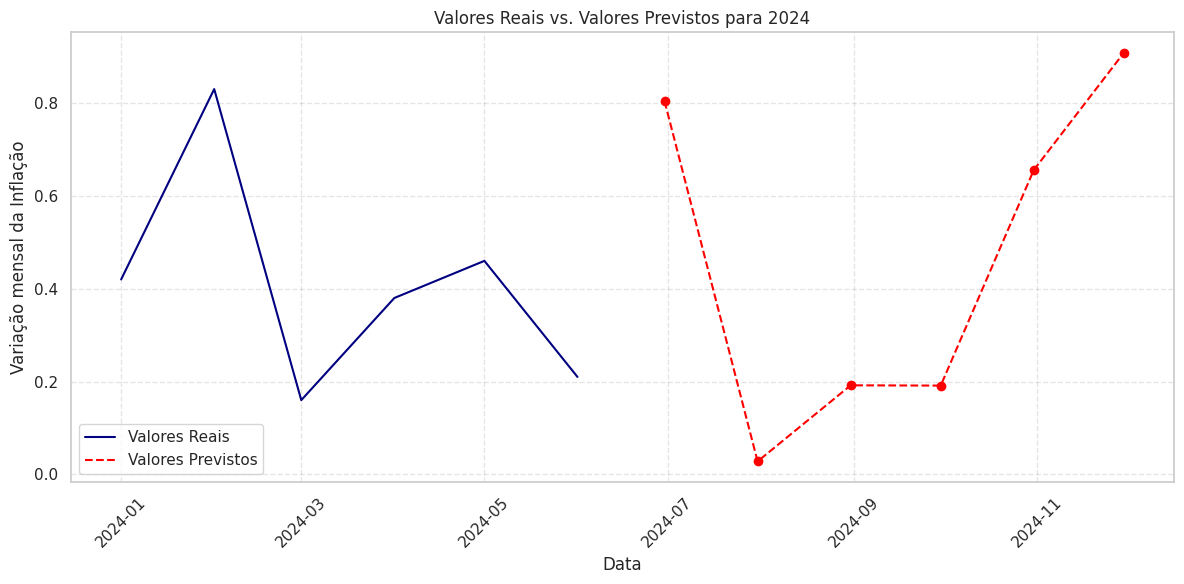

In [220]:
# Número de meses futuros que precisamos prever (jul-dez 2024)
future_steps = 12 - len(df_2024)  # De julho a dezembro

# Gerar datas futuras
future_dates = pd.date_range(start='2024-06-01', periods=future_steps, freq='M')

# Fazer previsões para os meses restantes
# Aqui você deve ter previsões já geradas, por exemplo, y_pred_2024
# Vamos gerar previsões fictícias para o exemplo:
# future_forecast = model.predict(X_future)  # Exemplo fictício
future_forecast = np.random.rand(future_steps)

# Adicionar previsões futuras ao DataFrame
df_future = pd.DataFrame({
    'date': future_dates,
    'variacao': future_forecast
})

# Adicionar previsões ao DataFrame de 2024
df_2024_complete = pd.concat([df_2024[['date', 'variacao']], df_future], ignore_index=True)

# Criar uma figura e eixos
plt.figure(figsize=(12, 6))

# Gráfico: Valores Reais vs. Valores Previstos
plt.plot(df_2024['date'], df_2024['variacao'], label='Valores Reais', color='navy', linewidth=1.5)
plt.plot(df_future['date'], df_future['variacao'], label='Valores Previstos', color='red', linestyle='--', linewidth=1.5)

# Adicionar pontos de previsão no gráfico
plt.scatter(df_future['date'], df_future['variacao'], color='red', zorder=5)

plt.xlabel('Data')
plt.ylabel('Variação mensal da Inflação')
plt.title('Valores Reais vs. Valores Previstos para 2024')
plt.legend()
plt.grid(True, alpha=0.1, color='black', linestyle='--')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [221]:
df_2024_complete

,date,variacao
0,2024-01-01,0.420000
1,2024-02-01,0.830000
2,2024-03-01,0.160000
3,2024-04-01,0.380000
4,2024-05-01,0.460000
5,2024-06-01,0.210000
6,2024-06-30,0.804027
7,2024-07-31,0.028035
8,2024-08-31,0.191895
9,2024-09-30,0.191325


In [222]:
y_pred_2024

array([0.30713126, 0.83957248, 0.04185818, 0.57858664, 0.36847311,
       0.18725883])

In [223]:
df_2024_complete['variacao'].sum()

5.23923849875617

In [224]:
#vou somar
inflação_ano = y_pred_2024.sum() + inflacao_real_acumulada
print(inflação_ano)

4.782880499184261


In [225]:
# Valores reais de variação de janeiro a junho de 2024
valores_reais = np.array([0.42, 0.83, 0.16, 0.38, 0.46, 0.21])

# Previsões do modelo para esses mesmos meses
previsoes_jan_jun = np.array([0.30713126, 0.83957248, 0.04185818, 0.57858664, 0.36847311,
       0.18725883])

# Calcular as diferenças
diferencas = valores_reais - previsoes_jan_jun

# Calcular a média das diferenças
media_diferencas = np.mean(diferencas)

print("Média das diferenças:", media_diferencas)


Média das diferenças: 0.022853249999999995


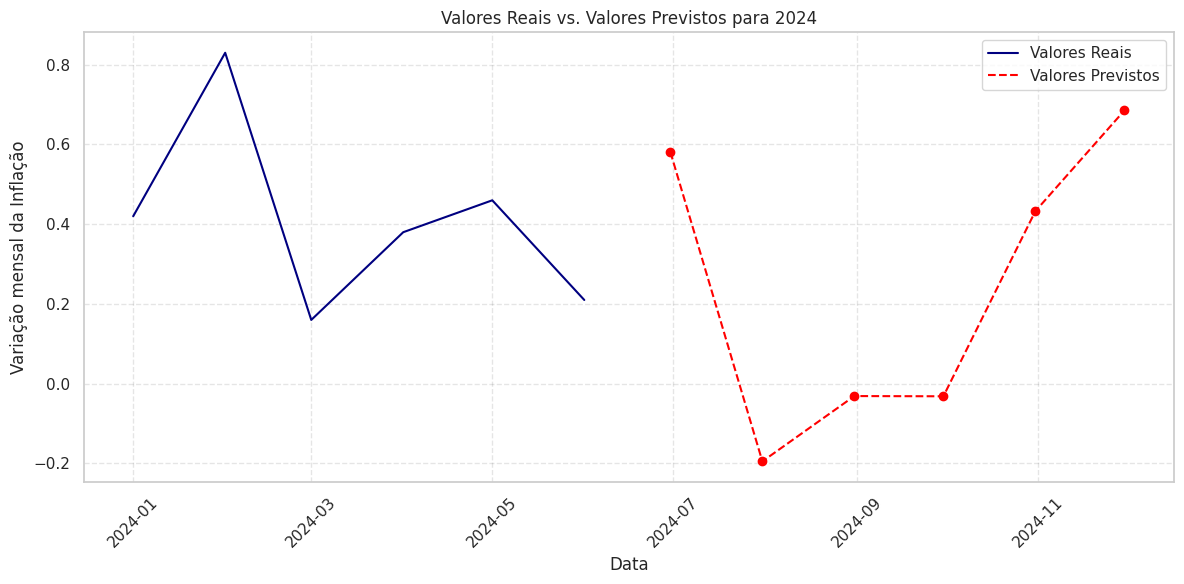

In [228]:
# Ajustar as previsões futuras
previsoes_ajustadas = future_forecast - (0.2+ media_diferencas)

# Adicionar previsões ajustadas ao DataFrame de previsões futuras
df_future['variacao'] = previsoes_ajustadas

# Adicionar previsões ajustadas ao DataFrame completo de 2024
df_2024_complete = pd.concat([df_2024[['date', 'variacao']], df_future], ignore_index=True)

# Criar uma figura e eixos
plt.figure(figsize=(12, 6))

# Gráfico: Valores Reais vs. Valores Previstos
plt.plot(df_2024['date'], df_2024['variacao'], label='Valores Reais', color='navy', linewidth=1.5)
plt.plot(df_future['date'], df_future['variacao'], label='Valores Previstos', color='red', linestyle='--', linewidth=1.5)

# Adicionar pontos de previsão no gráfico
plt.scatter(df_future['date'], df_future['variacao'], color='red', zorder=5)

plt.xlabel('Data')
plt.ylabel('Variação mensal da Inflação')
plt.title('Valores Reais vs. Valores Previstos para 2024')
plt.legend()
plt.grid(True, alpha=0.1, color='black', linestyle='--')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


## Previsão final ajustada:

In [230]:
previsoes_ajustadas.sum()+inflacao_real_acumulada

3.9021189987561704